In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Обобщени полиноми. Интерполиране с обобщени полиноми.

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните.

In [33]:
t = np.array([1, 2, 3, 4, 5])
cells = np.array([1, 12, 110, 1037, 12218])

#the data rises very fast therefore we have to use exponential polynomial
n = 5
A = np.zeros([n,n])
def create_matrix(A, n):
    for i in range(n):
        for j in range(n):
            A[i][j] = np.exp(t[i] * j)

create_matrix(A, n)

solution = np.linalg.solve(A, cells)
solution

array([ 1.05060273e-01, -3.82376156e-01,  2.57280204e-01,  1.65052200e-03,
        2.49829522e-06])

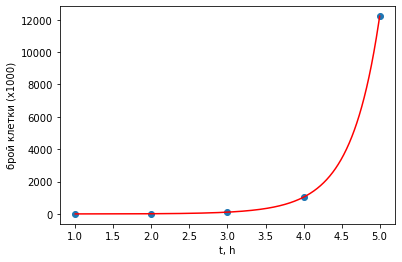

In [35]:
#finding the function from solution
def exp_poly_1(x, solution):
    poly = 0;
    for i in range(cells.size):
        poly += solution[i] * np.exp(i * x)
    return poly

x_axis = np.linspace(1, 5, 1000)
plt.plot(x_axis, exp_poly_1(x_axis, solution), color = 'r')
plt.scatter(t, cells)
plt.xlabel('t, h')
plt.ylabel('брой клетки (x1000)')
plt.show()

### Задача 2

В таблицата са дадени данни за зависимостта между нивото на алкохол в кръвта (BAC - Blood Alcohol Level) и относителния риск за попадане в ПТП (т.е. колко пъти се увеличава рискът спрямо водач, който не е употребявал алкохол)

|  BAC  |  0 | 0.03 | 0.07 | 0.15 | 0.21 | 0.27 |
| --- | --- | --- | --- | --- | --- | --- |
| relative risk of crashing|  1 |1.06| 2.09 | 22.1 | 99.78 | 328.602 |

Да се построи интерполационен полином по подходящ базис, който описва данните от таблицата. Да се начертае графиката му, заедно с данните от таблицата.

In [48]:
#exponential polynomial
bac = np.array([0, 0.03, 0.07, 0.15, 0.21, 0.27])
rrc = np.array([1, 1.06, 2.09, 22.1, 99.78, 328.602])

n = 6

A = np.zeros([6, 6])
def fill_matrix(A, n, bac):
    for i in range(n):
        for j in range(n):
            A[i][j] = np.exp(j * bac[i])

fill_matrix(A, n, bac)

sol = np.linalg.solve(A, rrc)
sol

array([ 5.38042614e+04, -2.09024759e+05,  3.04729868e+05, -1.97591583e+05,
        4.80844797e+04, -1.26675331e+00])

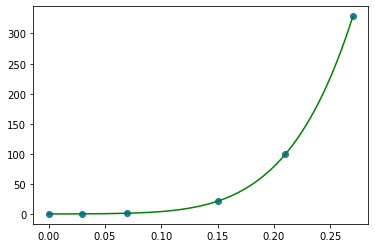

In [64]:
def exp_poly_2(x, sol, rrc):
    poly = 0;
    for i in range(rrc.size):
        poly += sol[i] * np.exp(i * x)
    return poly
    
x_axis_2 = np.linspace(0, 0.27, 1000)

plt.scatter(bac, rrc)
plt.plot(x_axis_2, exp_poly_2(x_axis_2, sol, rrc), color = 'green')
plt.show()

### Задача 3

В таблицата са дадени данни от сигнал на акселерометър в 5 момента от време:

|  t, ms  |  1 | 1.5 | 3 | 4 | 6 |
| --- | --- | --- | --- | --- | --- | 
| ускорение, $m/s^2$|  0 |1| 1.2 | 4 | 2 |

Да се намери обощен полином по подходящ базис, който интерполира тези данни, ако е известно, че сигналът се описва от периодична функция с период а) $T=2\pi$; б) $T=8$.
Да се начертае графиката на полинома в интервала $[0, 4 \pi]$ заедно с точките в една координатна система във всеки от случаите.

In [139]:
x_axis = np.linspace(0, math.pi * 4, 1000)

t = np.array([0, 1.5, 3, 4, 6])
acceleration = np.array([0, 1, 1.5, 4, 2])

n = 5
A = np.ones([n, n])

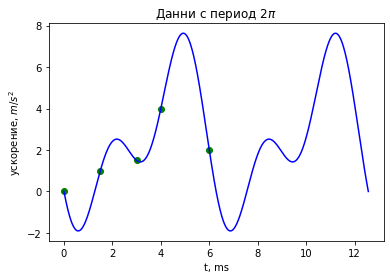

In [141]:
#a) T = 2PI

def fill_matrix_trigonometry(A, n, t):
    for i in range(n):
        for j in range(1, n):
            if(j % 2 != 0):
                A[i, j] = np.cos((math.floor(j / 2) + 1) * t[i])
            else:
                A[i, j] = np.sin(j / 2 * t[i])

fill_matrix_trigonometry(A, n, t)
solution = np.linalg.solve(A, acceleration)
solution

def poly_exc_3_a(solution, x):
    poly = solution[0] + solution[1] * np.cos(x) + solution[2] * np.sin(x) + solution[3] * np.cos(2 * x) + solution[4] * np.sin(2 * x)
    return poly

poly_a = poly_exc_3_a(solution, x_axis)
plt.plot(x_axis, poly_a, color = 'blue')
plt.scatter(t, acceleration, color = 'green')
plt.title("Данни с период $2 \pi$")
plt.xlabel('t, ms')
plt.ylabel('ускорение, $m/s^2$')
plt.show()

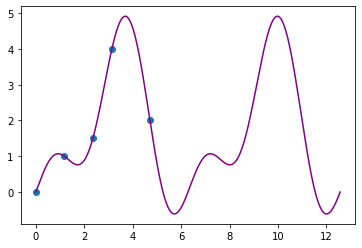

In [155]:
#b) T = 8
# we have to change the period first!!!!
t_changed = (2 * np.pi) / 8 * t

def fill_matrix_b(t_changed, n, A):
    for i in range(n):
        for j in range(1, n):
            if j % 2 != 0:
                A[i][j] = np.cos((math.floor(j / 2) + 1) * t_changed[i])
            else:
                A[i][j] = np.sin(j / 2 * t_changed[i])

fill_matrix_b(t_changed, n , A)

sol = np.linalg.solve(A, acceleration)
sol

def poly_exc_3_b(sol, x):
    poly = sol[0] + sol[1] * np.cos(x) + sol[2] * np.sin(x) + sol[3] * np.cos(2 * x) + sol[4] * np.sin(2 * x)
    return poly

poly_b = poly_exc_3_b(sol, x_axis)
plt.scatter(t_changed, acceleration)
plt.plot(x_axis, poly_b, color = 'purple')
plt.show()

### Задача 4

В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намерения полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

In [220]:
#period T = 365 -> change it 
days_with_august = np.arange(0, 12 * 30, 30)
days = np.delete(days_with_august, 7)
t_changed = (2 * np.pi) / 365 * days
sr = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2, 57.8, 37.7])
n = 11
t_changed.size

11

In [233]:
A = np.ones([11, 11])
def fill_matrix_trigonometry_4(A, n, t):
    for i in range(n):
        for j in range(1, n):
            if(j % 2 != 0):
                A[i, j] = np.cos((math.floor(j / 2) + 1) * t[i])
            else:
                A[i, j] = np.sin(j / 2 * t[i])

fill_matrix_trigonometry_4(A, n, t_changed)

sol = np.linalg.solve(A, sr)
sol

array([ 151.88393071, -115.9432057 ,   32.51077414,   12.48741795,
          8.70831122,   -2.79319775,   -3.72774053,    2.10817026,
          2.19655988,   -1.84311547,   -2.8214263 ])

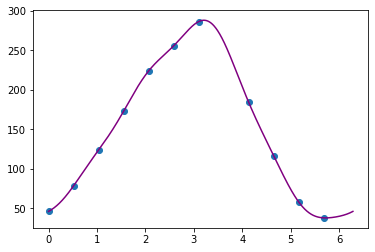

In [275]:
def poly_exc_4(x, sol):
    poly = sol[0]
    for i in range(1 , sol.size):
        if (i % 2 != 0):
            poly += sol[i] * np.cos((math.floor(i / 2) + 1) * x)
        else:
            poly += sol[i] * np.sin(i / 2 * x)
    return poly

x_axis = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x_axis, poly_exc_4(x_axis, sol), color = 'purple')
plt.scatter(t_changed, sr)
plt.show()

In [295]:
august = 30 * 7
x = (2 * np.pi) / 365 * august
approximate_res = poly_exc_4(x, sol)
print(approximate_res)

260.7935639691475


In [292]:
actual_res = 257.9
def absolute_error(x):
    return actual_res - approximate_res

absolute_error(august)

-2.8935639691475217